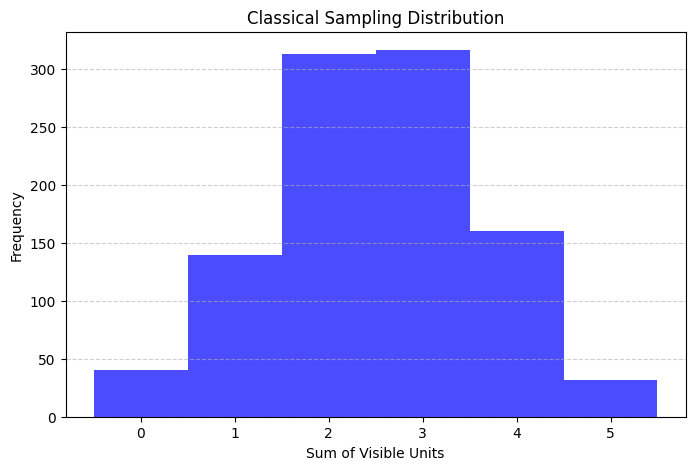

Optimal Parameter: {   'fun': -1.0,
    'jac': None,
    'nfev': 13,
    'nit': None,
    'njev': None,
    'x': array([-2.77555756e-17])}


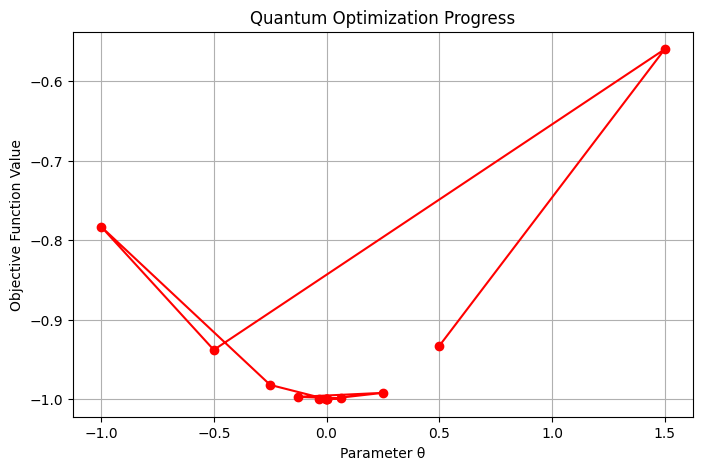

In [8]:
#-------------------------------------------------------------------------
# Hybrid QBM 
# Chapter 9 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.1
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
#-------------------------------------------------------------------------

# Classical sampling function
def classical_sampling(num_samples, weights, biases):
    samples = []
    for _ in range(num_samples):
        visible = np.random.choice([0, 1], size=len(biases))
        samples.append(visible)
    return np.array(samples)
#-------------------------------------------------------------------------

# Objective function
def cost_function(param):
    simulator = Aer.get_backend('aer_simulator')
    circuit = qc.bind_parameters({theta: float(param[0])})  # FIXED: Ensure param is a scalar
    result = execute(circuit, simulator, shots=1000).result()
    counts = result.get_counts()
    expectation = counts.get('0', 0) / sum(counts.values())
    return -expectation  # Minimize energy
#-------------------------------------------------------------------------

def cost_tracking(param):
    value = cost_function(param)
    optimization_steps.append((float(param[0]), value))  # FIXED: Extract scalar value
    return value
#-------------------------------------------------------------------------

# Parameters for classical sampling
num_samples = 1000
num_visible = 5
weights = np.random.randn(num_visible)  # Randomized weights
biases  = np.random.randn(num_visible)  # Randomized biases

# Generate classical samples
classical_samples = classical_sampling(num_samples, weights, biases)

# Plot classical sampling results
plt.figure(figsize=(8, 5))
plt.hist(classical_samples.sum(axis=1), bins=np.arange(-0.5, num_visible + 1.5, 1), color='blue', alpha=0.7)
plt.xlabel("Sum of Visible Units")
plt.ylabel("Frequency")
plt.title("Classical Sampling Distribution")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Quantum optimization using Qiskit
theta = Parameter('θ')
qc = QuantumCircuit(1)
qc.rx(theta, 0)
qc.measure_all()



# Optimize using COBYLA
optimizer = COBYLA(maxiter=100)
optimization_steps = []

result = optimizer.minimize(fun=cost_tracking, x0=[0.5])
optimal_param = result
print("Optimal Parameter:", optimal_param)

# Plot optimization process
params, values = zip(*optimization_steps)
plt.figure(figsize=(8, 5))
plt.plot(params, values, marker='o', linestyle='-', color='red')
plt.xlabel("Parameter θ")
plt.ylabel("Objective Function Value")
plt.title("Quantum Optimization Progress")
plt.grid(True)
plt.show()
